Streaming data dan data preprocessing Kelompok 5 PDB

12S18002 : Wiranda Siahaan

12S18009 : Novita Enjelia Hutapea

12S18041 : Merika H. Manurung

12S18046 : Tiara Octavia Situmorang

# Consume twitter steaming data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import socket
import json
import numpy as np
import pandas as pd

In [ ]:
#Kindly put your credentials received from twitter developer account
consumer_key='2mTmxHwkZramjVDOewE2dybgQ'
consumer_secret='dJ42E93prTAze5BoF4wAIcxYA6gXfu9rGrHr6gguUt85xcHJSi'
access_token ='1517128047019040768-YMZCcFIf6VLbZXNkJsa79sZk70xFkM'
access_secret='Auwa9WPIktjUCrgQmzceZsdMtMA2hbnebSR7QlmYEdrlq'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [ ]:
for tweet in api.search(q='miniso', lan='en'):    
    print(tweet.text)

@banjarbase Di dm ada store miniso
@banjarbase ada, di miniso
someone needs to take me to miniso
@ohmybeautybank aku pake miniso
@ohmybeautybank duh kalo itu kurang tau tp aku pake penjepit bulu mata miniso dan lumayan lentik di aku
@mritzzha itu td ad lewat beli mainan di miniso
yg pernah pake earphone miniso ini minta review nya dong https://t.co/jnkTIx7uy8
nyesel beli dompet di miniso bener" ga awet cepet rusaknya , udah 2 kali beli dompet miniso soalnya huhuhuhuhu blm jg 1 thn anjir
RT @MarvelThaiFan: #Miniso ลดครึ่งของ Marvel อยู่จ้า https://t.co/lyRTmCvT1Q
Casi 3am desperté a mis papás para mañanaa fueran a miniso tempra a comprarme cositas de marvel. Wenaas noches
RT @MarvelThaiFan: #Miniso ลดครึ่งของ Marvel อยู่จ้า https://t.co/lyRTmCvT1Q
[BB] Review Parfum miniso yang ini dong, yang enak varian apa? Sender mau ngirimin buat temen sender :&gt; TIA https://t.co/j3ScYv7AcC
WTS | READY INA

Photocard PC Sehun Chanyeol Japan 5th Anniv Miniso Figure AR Selca DFTF 

💰 on pic

🏠 Bante

In [ ]:
tweetDf = pd.DataFrame(columns = ['User', 'User_statuses_count', 
                             'user_followers','fav_count','User_location','Tweets',])

In [ ]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100000, lang='en').items():
        print(i, end='\r')
        tweetDf.loc[i, 'User'] = tweet.user.name
        tweetDf.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        tweetDf.loc[i, 'user_followers'] = tweet.user.followers_count
        tweetDf.loc[i, 'fav_count'] = tweet.favorite_count
        tweetDf.loc[i, 'User_location'] = tweet.user.location
        tweetDf.loc[i, 'Tweets'] = tweet.text
        
        
        tweetDf.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 200:
            break
        else:
            pass

In [ ]:
stream(data = ['miniso'], file_name = 'miniso_2021')

In [ ]:
tweetDf.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,nat🦙,4502,63,0,she/her | sb to unf,someone needs to take me to miniso
1,qya’,1623,35,0,ina - wts/wtb/wtt acc,WTS | READY INA\n\nPhotocard PC Sehun Chanyeol...
2,Shreyasi,1253,16,0,"Kolkata, India",@amazonIN really disappointed about the produc...
3,j 💜 • I TALKED TO YERI 😭,16299,1961,2,"""Love u!!! :)"", 220401",WHY DID I JUST FOUND OUT THAT THERE IS A HUMON...
4,Dyv.,2841,167,0,,@OOTDFESS miniso nder


## Data Preprocessing

In [ ]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [ ]:
dataset = pd.read_csv('miniso_2021.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [ ]:
dataset.head()

,Unnamed: 0,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,0,nat🦙,4502,63,0,she/her | sb to unf,someone needs to take me to miniso
1,1,qya’,1623,35,0,ina - wts/wtb/wtt acc,WTS | READY INA\n\nPhotocard PC Sehun Chanyeol...
2,2,Shreyasi,1253,16,0,"Kolkata, India",@amazonIN really disappointed about the produc...
3,3,j 💜 • I TALKED TO YERI 😭,16299,1961,2,"""Love u!!! :)"", 220401",WHY DID I JUST FOUND OUT THAT THERE IS A HUMON...
4,4,Dyv.,2841,167,0,NaN,@OOTDFESS miniso nder


In [ ]:
print(dataset.shape)

(200, 7)


### drop coloumn

In [ ]:
to_drop = ['Unnamed: 0', 'User', 'User_statuses_count', 'user_followers', 'fav_count', 'User_location']

In [ ]:
dataset.drop(to_drop, inplace=True, axis = 1)

In [ ]:
dataset.head()

,Tweets
0,someone needs to take me to miniso
1,WTS | READY INA\n\nPhotocard PC Sehun Chanyeol...
2,@amazonIN really disappointed about the produc...
3,WHY DID I JUST FOUND OUT THAT THERE IS A HUMON...
4,@OOTDFESS miniso nder


In [ ]:
print(dataset.shape)

(200, 1)


### missing value

In [ ]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
dataset1 = dataset.dropna()
print(dataset1.shape)

(200, 1)


# Text Preprocessing



In [ ]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

## Case folding

In [ ]:
# Change text column to lower lower case
dataset1['Tweets'] = dataset1['Tweets'].str.lower()

# Look at the change
print(dataset1)

                                                Tweets
0                   someone needs to take me to miniso
1    wts | ready ina\n\nphotocard pc sehun chanyeol...
2    @amazonin really disappointed about the produc...
3    why did i just found out that there is a humon...
4                                @ootdfess miniso nder
..                                                 ...
195  rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
196  @ulunne_ @abujaplug @abujastreets @iamjohnkelv...
197                               let's go to miniso ?
198  rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
199  @thedrsly @abujaplug @abujastreets @iamjohnkel...

[200 rows x 1 columns]


## Remove URL

In [ ]:
def clean_data(dataset2):
#replace URL of a text
    dataset1['Tweets'] = dataset2['Tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(dataset1)
print(dataset1['Tweets']);

0                     someone needs to take me to miniso
1      wts | ready ina\n\nphotocard pc sehun chanyeol...
2      @amazonin really disappointed about the produc...
3      why did i just found out that there is a humon...
4                                  @ootdfess miniso nder
                             ...                        
195    rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
196    @ulunne_ @abujaplug @abujastreets @iamjohnkelv...
197                                 let's go to miniso ?
198    rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
199    @thedrsly @abujaplug @abujastreets @iamjohnkel...
Name: Tweets, Length: 200, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Number

In [ ]:
# removing numbers from strings of speciafied 
# column, here 'Name'
dataset1['Tweets']= dataset1['Tweets'].str.replace('\d+', '')
  
# display output with numbers removed from 
# required strings
print(dataset1)

                                                Tweets
0                   someone needs to take me to miniso
1    wts | ready ina\n\nphotocard pc sehun chanyeol...
2    @amazonin really disappointed about the produc...
3    why did i just found out that there is a humon...
4                                @ootdfess miniso nder
..                                                 ...
195  rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
196  @ulunne_ @abujaplug @abujastreets @iamjohnkelv...
197                               let's go to miniso ?
198  rt @kyvo_gvr: wts | lfb [help rt] \n\n𓂋 baekhy...
199  @thedrsly @abujaplug @abujastreets @iamjohnkel...

[200 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Punctuation

In [ ]:
dataset1['Tweets'] = dataset1['Tweets'].str.replace(r'[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text) 
    text = re.sub('\n+',' ',text)
    text = re.sub('\n', text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)


    return text

In [ ]:
clean_data(dataset1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(dataset1)

                                                Tweets
0                   someone needs to take me to miniso
1    wts  ready ina\n\nphotocard pc sehun chanyeol ...
2    amazonin really disappointed about the product...
3    why did i just found out that there is a humon...
4                                 ootdfess miniso nder
..                                                 ...
195  rt kyvo_gvr wts  lfb help rt \n\n𓂋 baekhyun mi...
196  ulunne_ abujaplug abujastreets iamjohnkelvin r...
197                                 lets go to miniso 
198  rt kyvo_gvr wts  lfb help rt \n\n𓂋 baekhyun mi...
199  thedrsly abujaplug abujastreets iamjohnkelvin ...

[200 rows x 1 columns]


## Hasil Akhir

In [ ]:
dataset1.to_csv('preprocessing_PDB.csv', index = False)

In [ ]:
data = pd.read_csv('preprocessing_PDB.csv')

In [ ]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score  < 0:
        return 'Negatif'
    elif score == 0:
        return 'Netral'
    else:
        return 'Positiv'

In [ ]:
final_data = pd.DataFrame(data[['Tweets']])
final_data.head()

,Tweets
0,someone needs to take me to miniso
1,wts ready ina\n\nphotocard pc sehun chanyeol ...
2,amazonin really disappointed about the product...
3,why did i just found out that there is a humon...
4,ootdfess miniso nder


In [ ]:
final_data['Subjectivity'] = final_data['Tweets'].apply(getSubjectivity)
final_data['Polarity'] =  final_data['Tweets'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,Tweets,Subjectivity,Polarity,TextBlob
0,someone needs to take me to miniso,0.000000,0.000000,Netral
1,wts ready ina\n\nphotocard pc sehun chanyeol ...,0.500000,0.200000,Positiv
2,amazonin really disappointed about the product...,0.583333,-0.283333,Negatif
3,why did i just found out that there is a humon...,0.000000,0.000000,Netral
4,ootdfess miniso nder,0.000000,0.000000,Netral


In [ ]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Netral     102
Positiv     77
Negatif     21
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1ed72aeb50>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Netral'),
  Text(-0.3234444522546508, -1.0513722872064344, 'Positiv'),
  Text(1.2772151775079268, -0.43728868078581135, 'Negatif')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(-0.17642424668435494, -0.5734757930216914, '38.5%'),
  Text(0.8041725191716577, -0.2753299101243997, '10.5%')])

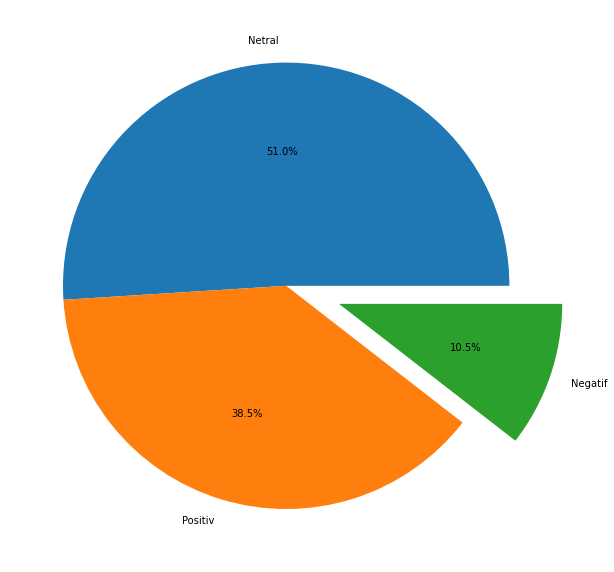

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
final_data.to_csv('/content/gdrive/My Drive/pdb/dataprepro.csv', index = False)